<a href="https://colab.research.google.com/github/ayushanand18/ocean-research-py/blob/main/notebooks/ayush's_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration
Let us explorate our data and bring out areas where we need to focus on in future.

## installing pyobis

In [2]:
try:
    import pyobis
except:
    %pip -q install pyobis
    import pyobis

Note: you may need to restart the kernel to use updated packages.


## importing other modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyobis.occurrences import OccQuery

In [4]:
try:
    import cartopy
except:
    %pip -q install cartopy
    import cartopy

## set up environment

In [5]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (18,10)

In [6]:
occ = OccQuery()

## Species to count
+ in west 
    + [ ] 126417 -> Clupea harengus Linnaeus
    + [ ] 126436 -> Gadus morhua Linnaeus
    + [ ] 126438 -> Merlangius merlangus
    + [ ] 126444 -> Trisopterus esmarkii
    + [ ] 126437 -> Melanogrammus aeglefinus
    + [ ] 126425 -> Sprattus sprattus
    + [ ] 127141 -> Platichthys flesus
    + [ ] 126792 -> Callionymus lyra Linnaeus
    + [ ] 126852 -> Trachurus trachurus
    + [ ] 110674 -> Meganyctiphanes Holt & Tattersall, high missing depth
+ in other parts
    + [ ] 274294 -> Microstomus pacificus, west US coast
    + [ ] 159581 -> Acanthurus coeruleus Bloch & Schneider
    + [ ] 110679 -> Thysanoessa Brandt, check below australia
+ some special mentions
    + [ ] 382879 -> Jasus edwardsii, numbers have declined over years
    + [x] 106656 -> Oithona similis Claus, seems really weird and interesting
    + [x] ~127094 -> Xiphias gladius Linnaeus, less time range but good variety~

## Analysis

### Taxon 106656

In [8]:
_106 = occ.search(
    taxonid = 106656,
    startdate = "1999-01-01",
    enddate = "2015-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 54091/54091
Fetched 54091 records.


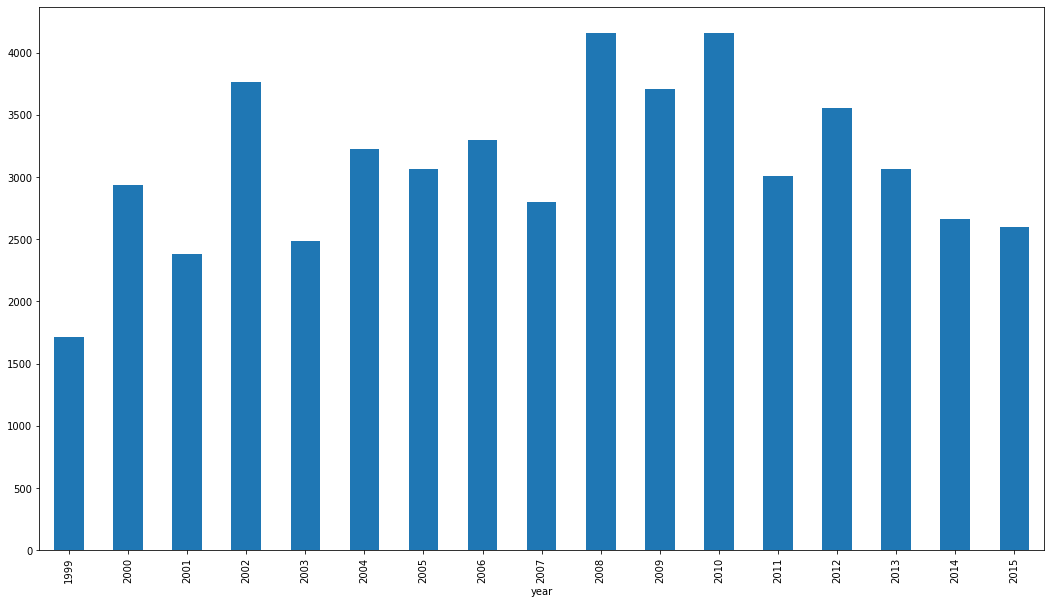

In [11]:
_106.groupby("year").scientificName.count().plot.bar();

<AxesSubplot:xlabel='year', ylabel='depth'>

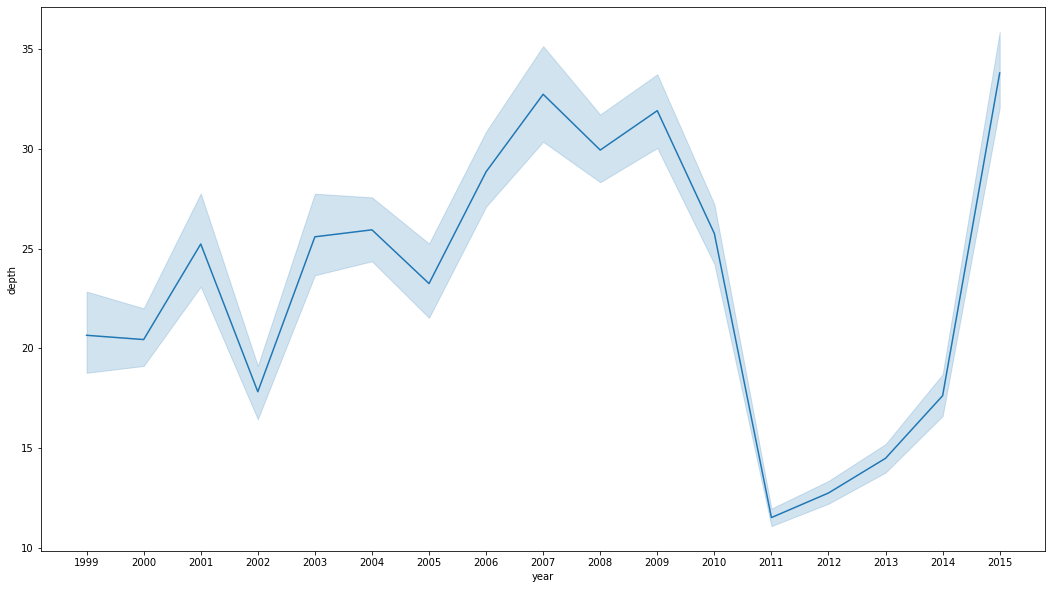

In [16]:
_106.sort_values(by="year", inplace=True)
sns.lineplot(x = _106["year"], y=_106["depth"])

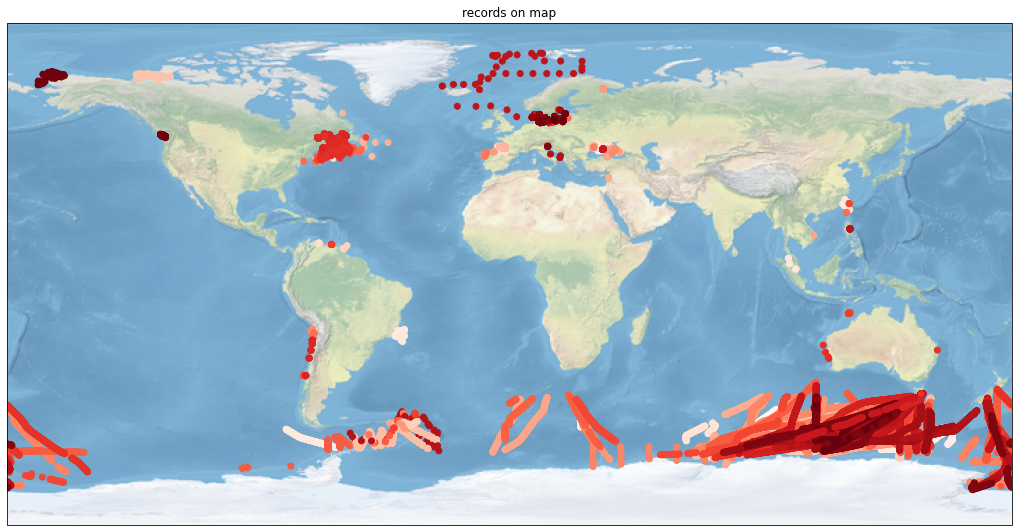

In [17]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=_106, transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")

plt.show()

## Taxon 127094

In [18]:
_127094 = occ.search(
    taxonid = 127094,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 86097/86097
Fetched 86097 records.


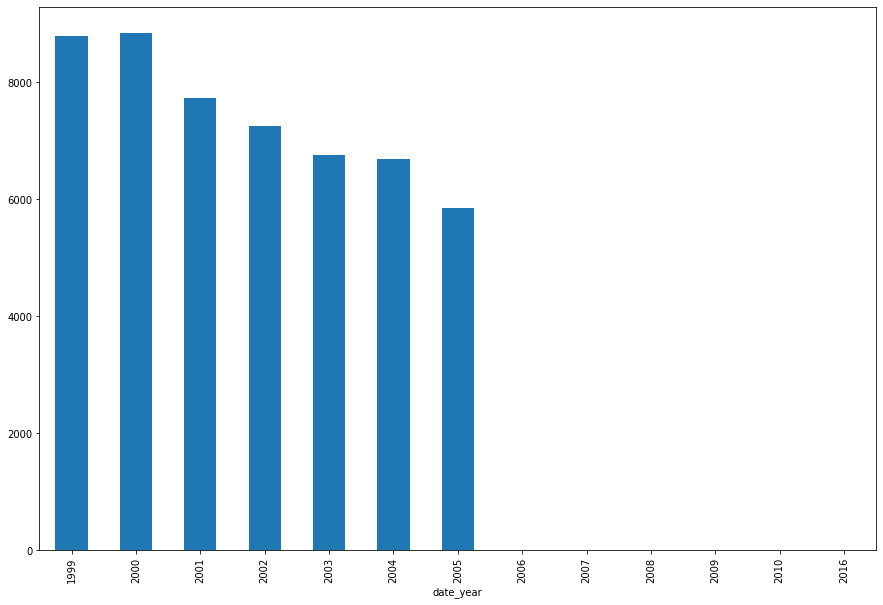

In [27]:
_127094.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

<AxesSubplot:xlabel='date_year', ylabel='depth'>

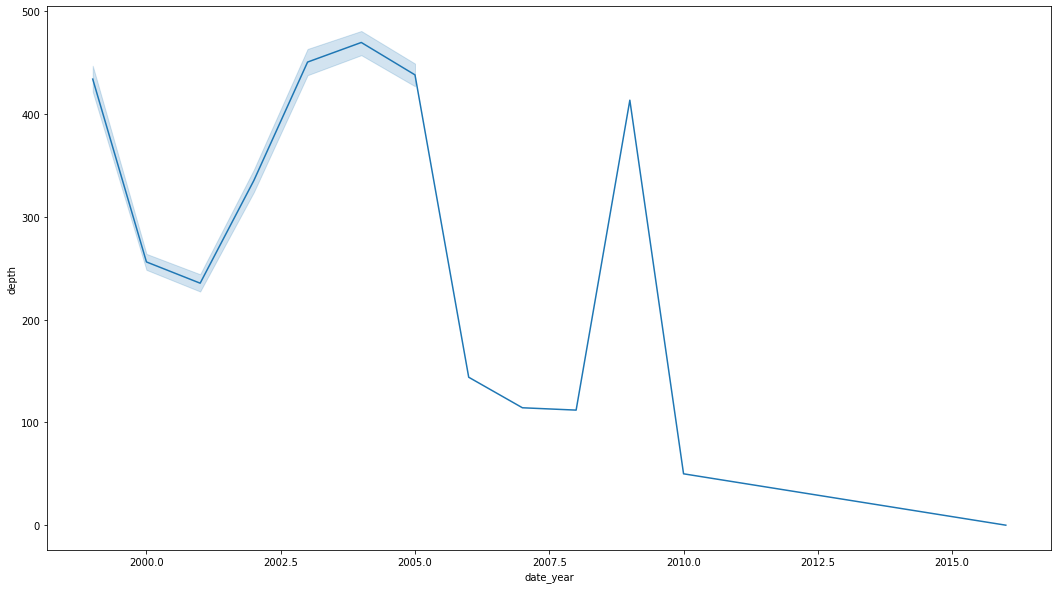

In [29]:
_127094.sort_values(by="date_year", inplace=True)
sns.lineplot(x = _127094["date_year"], y=_127094["depth"])

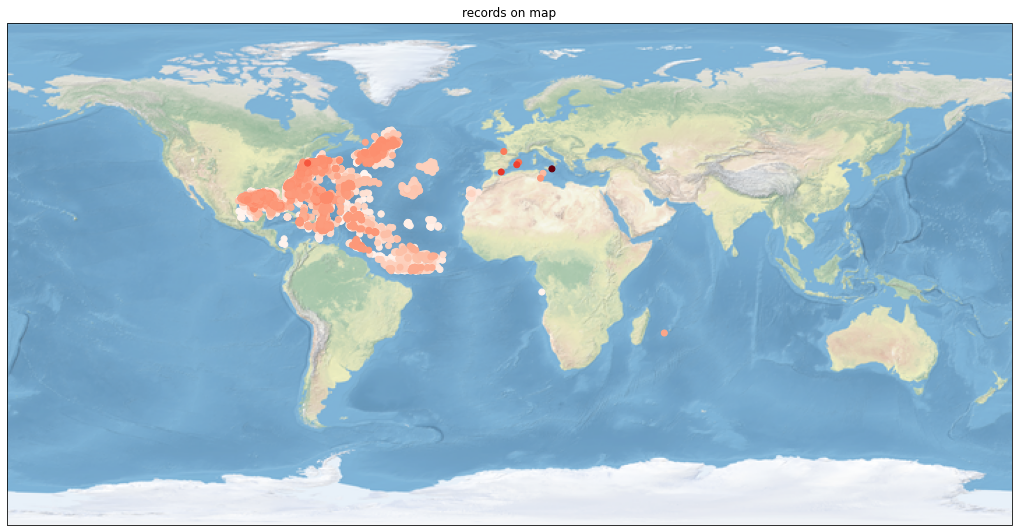

In [30]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=_127094, transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")

plt.show()

## Taxon 382879

In [ ]:
_382879 = occ.search(
    taxonid = 382879,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

In [ ]:
_382879.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

## Species to not count
+ [x] Anatarctic Fur Seal -> no depth 0
+ [x] Sea Butterfly -> no depth 396/5 lakhs
+ [x] Eudyptula minor -> temporal dist poor